`sketch001` is a really terrible notebook put together during the actual 1h hackathon/challenge.

it is awful because it barely has any structure and I've been away from this kind of things/code for almost a year and a half, which means I forgot some pretty basic stuff. but really really basic stuff.

this second notebook is my attempt to get (1) structure and (2) something working more or less quickly (ideally in under an hour). there is a version of a solution under `doc`, but I'll try not to pay any attention to that other than to copy all responses to start with tomorrow morning, right after my breakfast and before going to the wall for another 25 autobelay goes (or more). anyway, enough for tonight/today.

# Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
listings = pd.read_csv("./data/Edinburgh_AirBnb_listings_2.csv")
reviews = pd.read_csv("./data/Edinburgh_reviews_reduced.csv")

In [3]:
listings.head(3)

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,"Old Town, Princes Street and Leith Street",55.956892,-3.187677,Entire home/apt,80,3,14/11/2018,2.58,1,268
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,Meadows and Southside,55.942646,-3.184670,Entire home/apt,115,2,04/11/2018,1.73,2,66
2,33821,Stunning Central Edinburgh Festival Entire Flat,146109,Iona,Broughton North and Powderhall,55.964772,-3.189864,Entire home/apt,85,2,28/08/2018,2.02,2,122


In [4]:
reviews.head(3)

,listing_id,review_id,date,reviewer_id,reviewer_name,comments
0,15420,171793,18/01/2011,186358,Nels,My wife and I stayed at this beautiful apartme...
1,15420,176350,31/01/2011,95218,Gareth,Charlotte couldn't have been a more thoughtful...
2,15420,232149,19/04/2011,429751,Guido,I went to Edinburgh for the second time on Apr...


# Questions

## 1. How many listings are there for each room type?

In [5]:
listings.room_type.value_counts()

Entire home/apt    7366
Private room       4582
Shared room          37
Name: room_type, dtype: int64

## 2. What is the average price for Listings in each neighbourhood?

In [6]:
avg_prices = listings[['neighbourhood', 'price']].groupby(by='neighbourhood').mean()

#print(avg_prices.loc['Abbeyhill'])
avg_prices

,price
neighbourhood,
Abbeyhill,84.635870
Baberton and Juniper Green,81.928571
Balerno and Bonnington Village,68.866667
Balgreen and Roseburn,70.413333
"Barnton, Cammo and Cramond South",106.750000
"Bingham, Magdalene and The Christians",56.000000
"Blackford, West Mains and Mayfield Road",74.518182
Blackhall,76.363636
Bonaly and The Pentlands,79.777778


## 3. What is the distribution of minimum nights by room type?

room_type
Entire home/apt    [[Axes(0.125,0.125;0.775x0.755)]]
Private room       [[Axes(0.125,0.125;0.775x0.755)]]
Shared room        [[Axes(0.125,0.125;0.775x0.755)]]
dtype: object

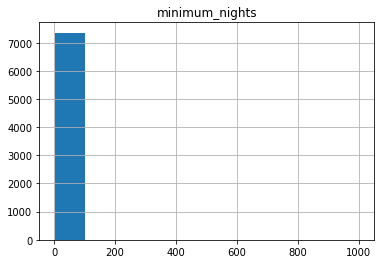

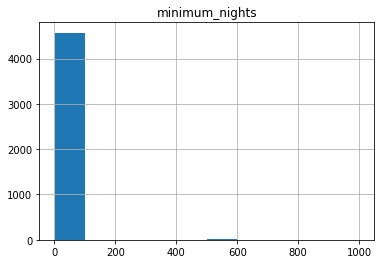

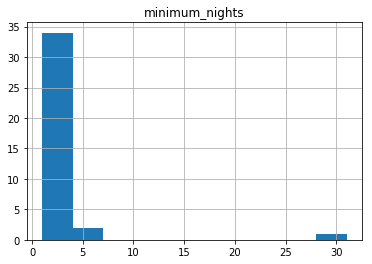

In [7]:
listings[['room_type', 'minimum_nights']].groupby('room_type').hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e7bb940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10eb6c860>]], dtype=object)

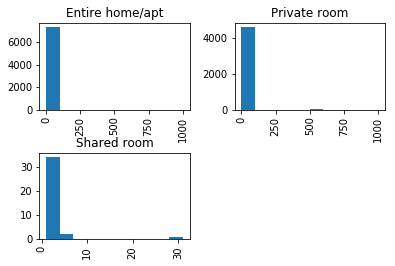

In [8]:
listings[['room_type', 'minimum_nights']].hist(by='room_type', bins=10)

But the choice plots in the answer are between 0 and 20.

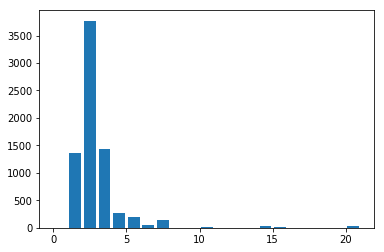

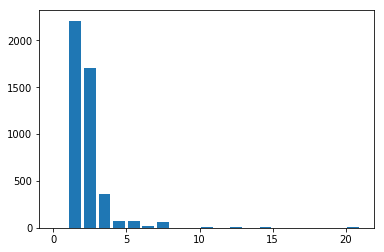

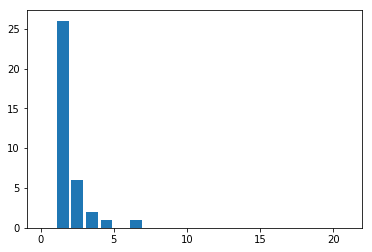

In [9]:
bins = np.linspace(0,21,22)
for room_type in listings.room_type.unique():
    hist, bin_edges = np.histogram(listings['minimum_nights'][listings.room_type == room_type], bins)
    plt.figure()
    plt.bar(((bins[:-1] + bins[1:])/2), hist)

I could have also used subplots and selected the different axes for each room type, via `plt.sca`.

## 4. How does the mean price of listings vary with the number of listings for each host?

(It took me 20 minutes to get here, with some help looking at the `matplotlib` functions).

In [10]:
data_listings = listings[['host_id', 'price']]
listings_number = data_listings.groupby('host_id').count()
listings_price = data_listings.groupby('host_id').mean()

In [11]:
mean_price_and_count = pd.merge(listings_price, listings_number,
                                left_index=True, right_index=True,
                                suffixes=('_mean', '_count'))

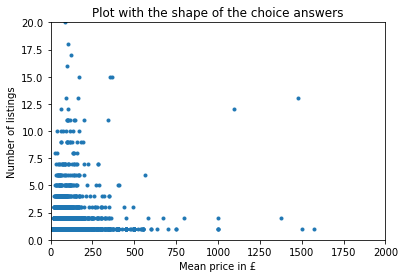

In [12]:
plt.plot(mean_price_and_count['price_mean'],
        mean_price_and_count['price_count'],
        '.')
plt.xlim([0, 2000])
plt.ylim([0, 20])
plt.xlabel('Mean price in £')
plt.ylabel('Number of listings')
plt.title('Plot with the shape of the choice answers');

The Pandas version I was using until now was a bit outdated (`0.20.1` as per `pd.__version__`). This means that `merge` doesn't work on named Series, which explains why my code is different than the suggested solution.

**May 5, 2017**, go figure. That must be the last time I did something "for real" with Pandas.

Paused to update Pandas here and sync the environment on my desktop as well. Now I have Pandas `0.24.0` and both the previous code and the newer one (below and easier to read) work.

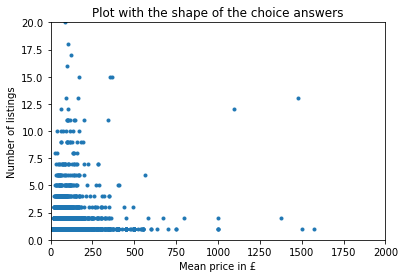

In [13]:
mean_price_and_count = pd.merge(listings_price, listings_number,
                                left_on="host_id", right_on="host_id",
                                suffixes=('_mean', '_count'))

plt.plot(mean_price_and_count['price_mean'],
        mean_price_and_count['price_count'],
        '.')
plt.xlim([0, 2000])
plt.ylim([0, 20])
plt.xlabel('Mean price in £')
plt.ylabel('Number of listings')
plt.title('Plot with the shape of the choice answers');

# 5. What is the cumulative percentage of the number of listings per host, ranked from most to fewest?

27 minutes to go. This is after my break to update the environment and... prepare for climbing. I might continue from the wall.

I also prepared all the questions (copied them here) to avoid looking at the solved doc from now on.

This question is about the cumulative percentage of the number of listings itself (how many 1, 2, 3, etc. listings are there).

In [47]:
listings_per_host = listings[['host_id',
                              'listing_id']].groupby('host_id').count().sort_values('listing_id', ascending=False)

The following sticks to the letter of the question (ranked from most to fewest times said number of listings per host).

In [99]:
cumsum_listings_per_host = listings_per_host['listing_id'].value_counts().sort_values(ascending=False).cumsum()
pd.DataFrame({'cumulative': 100* cumsum_listings_per_host/cumsum_listings_per_host.iloc[-1]})

,cumulative
1,82.338022
2,94.039659
3,96.944893
4,98.224579
5,98.743371
6,99.031589
7,99.308278
9,99.446622
11,99.550380
10,99.631081


The following sticks to a different interpretation of the question (ranked from most to fewest number of listings).

In [102]:
cumsum_listings_per_host = listings_per_host['listing_id'].value_counts().sort_index(ascending=False).cumsum()
pd.DataFrame({'cumulative': 100* cumsum_listings_per_host/cumsum_listings_per_host.iloc[-1]})

,cumulative
98,0.011529
84,0.023057
72,0.034586
50,0.046115
37,0.057644
36,0.069172
33,0.080701
32,0.092230
27,0.103758
25,0.115287


## 6. For listings with at least one review, what is the average number of reviews per listing, grouped by price?

The question doesn't say so, but the choices are per room_type, as graphs (histogram with 10 bins).

Just got to the half this question in the hour allotted.

In [138]:
num_reviews = reviews[['listing_id', 'review_id']].groupby('listing_id').count().rename(columns={'review_id': 'count'})
print(num_reviews.shape)
num_reviews.head(2)

(155, 1)


,count
listing_id,
15420,246
24288,172


In [146]:
listings_and_price_with_review = listings[['listing_id', 'price']][ listings.listing_id.isin(num_reviews.index)]
listings_and_price_with_review = pd.merge(listings_and_price_with_review,
                                          num_reviews,
                                          left_on='listing_id',
                                          right_on='listing_id')

listings_and_price_with_review.head()

,listing_id,price,count
0,15420,80,246
1,24288,115,172
2,33821,85,7
3,38628,46,44
4,44552,32,172


In [156]:
listings_with_reviews = pd.merge(listings, listings_and_price_with_review[['listing_id', 'count']].rename(columns={'count': 'num_reviews'}),
        left_on='listing_id', right_on='listing_id')

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365,num_reviews
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,"Old Town, Princes Street and Leith Street",55.956892,-3.187677,Entire home/apt,80,3,14/11/2018,2.58,1,268,246
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,Meadows and Southside,55.942646,-3.184670,Entire home/apt,115,2,04/11/2018,1.73,2,66,172
2,33821,Stunning Central Edinburgh Festival Entire Flat,146109,Iona,Broughton North and Powderhall,55.964772,-3.189864,Entire home/apt,85,2,28/08/2018,2.02,2,122,7
3,38628,Edinburgh Holiday Let,165635,Trish,Joppa,55.943081,-3.095248,Entire home/apt,46,4,31/10/2018,0.81,1,278,44
4,44552,Double room - spacious Leith flat,195950,Shaun,South Leith,55.966000,-3.172409,Private room,32,1,22/10/2018,1.71,1,81,172
5,47220,"Bright, Clean & Cosy 1 Bedroom Flat",188704,Rachael,Meadowbank and Abbeyhill North,55.958655,-3.170911,Entire home/apt,70,2,12/08/2018,0.98,1,46,95
6,47616,"City flat, close to nature and the Fringe",216203,Ben,"Canongate, Southside and Dumbiedykes",55.947319,-3.178512,Private room,100,2,31/08/2018,0.91,1,0,28
7,48645,Large Sunny Room on Royal Mile,221474,Mark,"Old Town, Princes Street and Leith Street",55.951133,-3.183797,Private room,50,1,16/11/2018,7.34,1,280,698
8,51505,Superb City Centre Apartment,236828,Francois,New Town West,55.955029,-3.198343,Entire home/apt,175,3,29/04/2018,0.06,6,0,6
9,54137,"Penthouse Loft 'share',dbl+en-suite",46498,Gordon,Meadows and Southside,55.943221,-3.185102,Private room,60,2,30/07/2017,0.45,2,0,44


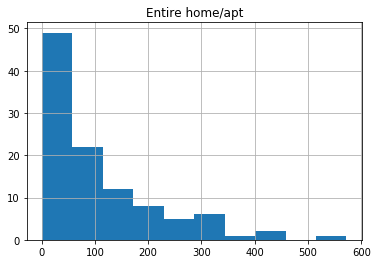

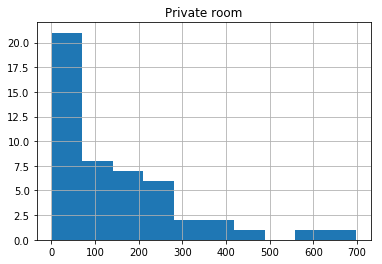

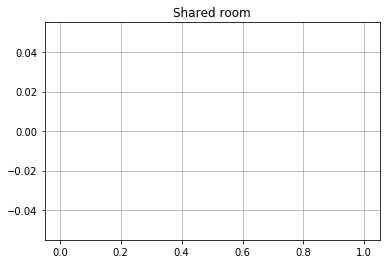

In [189]:
for room_type in listings.room_type.unique():
    reduced = listings_with_reviews[listings_with_reviews.room_type == room_type]

    reduced[['price', 'num_reviews']].hist('num_reviews')
    plt.title(room_type)

The above might seem a good idea, but there is no `num_reviews` average, just counts of instances. 

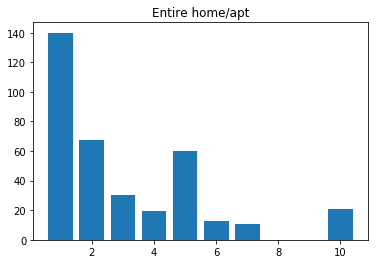

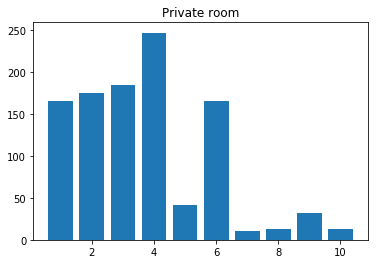

In [262]:
for room_type in listings.room_type.unique():
    # We will use copy to avoid pandas warnings about assignment to copies
    reduced = listings_with_reviews.loc[listings_with_reviews.room_type == room_type].copy()
    
    # There are room types without reviews
    if reduced.shape[0] > 0:
        # to match the choice plots
        bins = np.linspace(
                np.min(reduced.price),
                np.max(reduced.price),
                11
            )
        
        # binning
        reduced['bin'] = pd.cut(reduced['price'], bins)
        # mean of reviews number
        price_mean_by_bin = reduced[['bin', 'num_reviews']].groupby('bin').mean()
    
        plt.figure()
        plt.title(room_type)
        plt.bar(range(1,11), price_mean_by_bin.num_reviews)


## 7. For listings with at least one review, plot the number of reviews per listing by the listing’s longitude and latitude

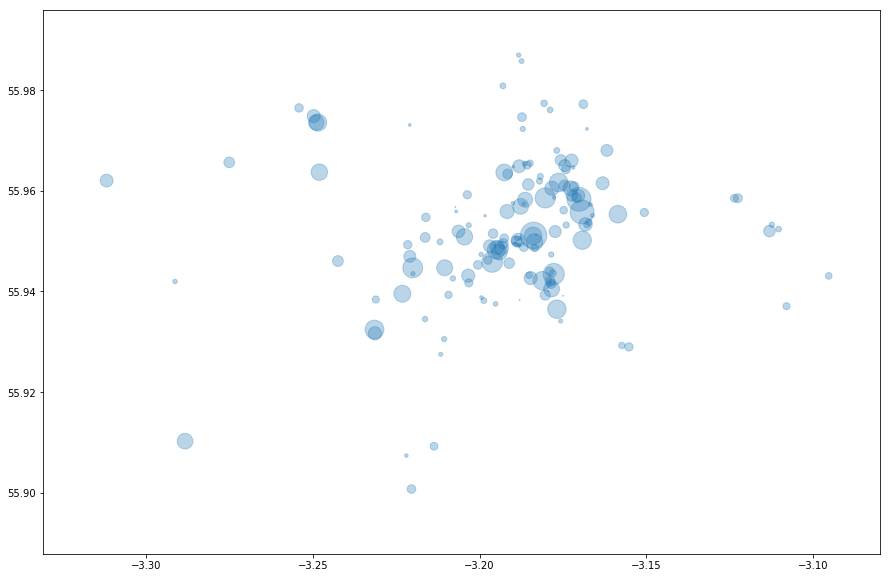

In [274]:
listings_with_reviews[['latitude','longitude', 'num_reviews']]

plt.figure(figsize=(15,10))
plt.scatter(x=listings_with_reviews.longitude,
            y=listings_with_reviews.latitude,
            s=listings_with_reviews.num_reviews,
           alpha=0.3);

## 8. What is the average length of review by property type?

Maybe it took me an hour more to get to this question.

In [276]:
listings_with_reviews 

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365,num_reviews
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,"Old Town, Princes Street and Leith Street",55.956892,-3.187677,Entire home/apt,80,3,14/11/2018,2.58,1,268,246
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,Meadows and Southside,55.942646,-3.184670,Entire home/apt,115,2,04/11/2018,1.73,2,66,172
2,33821,Stunning Central Edinburgh Festival Entire Flat,146109,Iona,Broughton North and Powderhall,55.964772,-3.189864,Entire home/apt,85,2,28/08/2018,2.02,2,122,7
3,38628,Edinburgh Holiday Let,165635,Trish,Joppa,55.943081,-3.095248,Entire home/apt,46,4,31/10/2018,0.81,1,278,44
4,44552,Double room - spacious Leith flat,195950,Shaun,South Leith,55.966000,-3.172409,Private room,32,1,22/10/2018,1.71,1,81,172
5,47220,"Bright, Clean & Cosy 1 Bedroom Flat",188704,Rachael,Meadowbank and Abbeyhill North,55.958655,-3.170911,Entire home/apt,70,2,12/08/2018,0.98,1,46,95
6,47616,"City flat, close to nature and the Fringe",216203,Ben,"Canongate, Southside and Dumbiedykes",55.947319,-3.178512,Private room,100,2,31/08/2018,0.91,1,0,28
7,48645,Large Sunny Room on Royal Mile,221474,Mark,"Old Town, Princes Street and Leith Street",55.951133,-3.183797,Private room,50,1,16/11/2018,7.34,1,280,698
8,51505,Superb City Centre Apartment,236828,Francois,New Town West,55.955029,-3.198343,Entire home/apt,175,3,29/04/2018,0.06,6,0,6
9,54137,"Penthouse Loft 'share',dbl+en-suite",46498,Gordon,Meadows and Southside,55.943221,-3.185102,Private room,60,2,30/07/2017,0.45,2,0,44


## 9. For each host, what is their year-on-year percentage change in number of reviews since 2010?

## 10. What percentage of reviewers have only left reviews for one neighbourhood?

In [27]:
reviews.reviewer_id.unique()

array([   186358,     95218,    429751, ..., 170850895,  29401305,
       183963464])

## 11. What percentage of hosts own listings with review lengths in the top 20% of review lengths?

## 12. What’s the average distance between listings for each neighbourhood?